# Niharika Gorain (Data Science and Business Analytics Task)
# Intern at The Spark Foundation

### Prediction Using Supervised ML

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
df=pd.read_csv("http://bit.ly/w-data")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


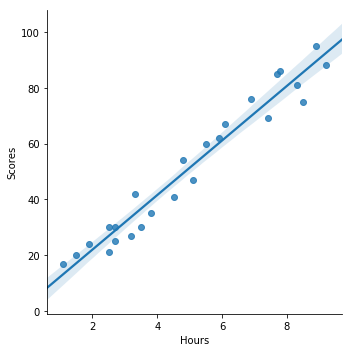

In [84]:
sns.lmplot(x='Hours',y='Scores',data=df) #regression plot

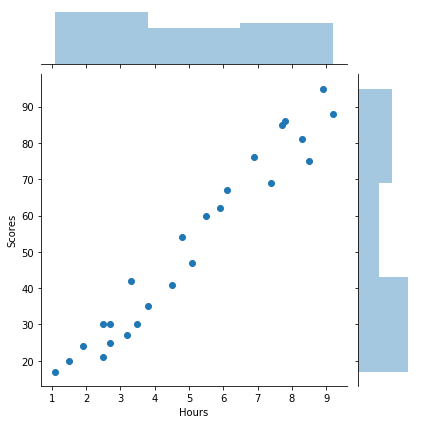

In [83]:
sns.jointplot(x='Hours',y='Scores',data=df,kind='scatter')

E:\anaconda_instalation_docs\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


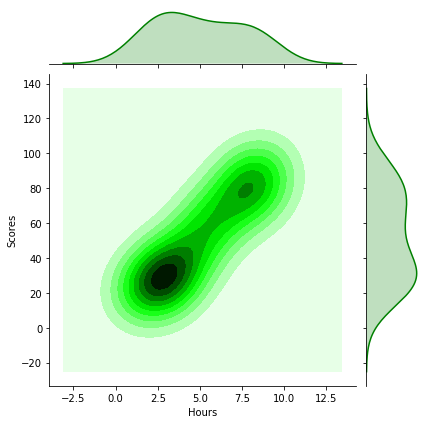

In [82]:
sns.jointplot(x='Hours',y='Scores',data=df,kind='kde',color='green')

In [30]:
x=df.drop('Scores',axis=1)
y=df['Scores']

## Model Building

In [31]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40) #train test split

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lm = LinearRegression()

In [47]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
lm.intercept_

1.7557382016513827

In [49]:
lm.coef_

array([9.74054996])

In [51]:
print("Coefficient of determination on training set: {}".format(lm.score(x_train, y_train)))

Coefficient of determination on train set: 0.9504931730009657


In [53]:
print("Coefficient of determination on test set: {}".format(lm.score(x_test, y_test)))

Coefficient of determination on test set: 0.9466449081971943


In [71]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lm,x,y,cv=5)
score

array([0.78626426, 0.97891923, 0.93182467, 0.96604831, 0.9273292 ])

In [72]:
score.mean()

0.9180771341891051

In [73]:
prediction=lm.predict(x_test)
prediction

array([88.44663283, 77.73202788, 12.47034316, 73.83580789, 33.89955306])

E:\anaconda_instalation_docs\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


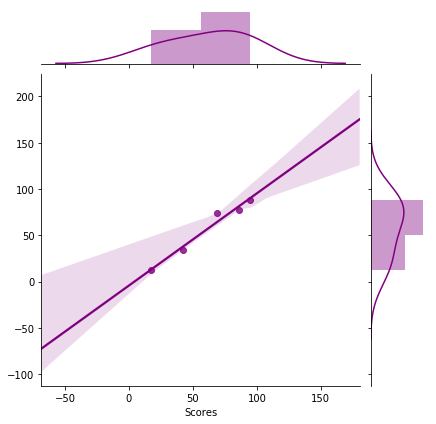

In [74]:
sns.jointplot(x=y_test,y=prediction,kind='reg',color='purple')

## Predicting score for studing 9.25 hours

In [79]:
print("Percentage after studying 9.25 hours/day is {}".format(lm.predict(np.array([9.25]).reshape(-1,1))[0]))

Percentage after studying 9.25 hours/day is 91.85582531626392


## Regression Evaluation Metrics

In [80]:
from sklearn import metrics

In [81]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
print('Mean Square Error:', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Square Eror:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error: 6.457450193167183
Mean Square Error: 44.1652107906905
Root Mean Square Eror: 6.645691144695975
